# Read data from object storage (minio)

In this example, we will use Pyarrow and s3fs to Read Parquet file. In the next spark demo, we will show how to use spark.

In [1]:
import pyarrow.parquet as pq
import s3fs
from pyarrow import fs
import os
import time

In [2]:
# This function reads a parquet data set (partitioned partque files) from s3, and returns an arrow table
def read_parquet_from_s3(endpoint: str, bucket_name, path):
    url = f"https://{endpoint}"
    fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': url})
    file_uri = f"{bucket_name}/{path}"
    str_info = fs.info(file_uri)
    print(f"input file metadata: {str_info}")
    dataset = pq.ParquetDataset(file_uri, filesystem=fs)
    table = dataset.read()
    return table

In [6]:
endpoint = os.environ['AWS_S3_ENDPOINT']
bucket = "pengfei"
data_path = "diffusion/data_format/sf_fire/parquet/raw"

At this step, only metadata is loaded.

In [7]:
arrow_table=read_parquet_from_s3(endpoint, bucket, data_path)

input file metadata: {'name': 'pengfei/diffusion/data_format/sf_fire/parquet/raw', 'type': 'directory', 'size': 0, 'StorageClass': 'DIRECTORY'}


In [ ]:
When we convert the arrow_table to pandas dataframe, we will load actual data.

In [16]:
raw = arrow_table.to_pandas()

In [17]:
print(f"shape of the data set: {raw.shape}")
print(f"schema of the data set: {raw.dtypes}")

shape of the data set: (5500519, 34)
schema of the data set: CallNumber                      int32
UnitID                         object
IncidentNumber                  int32
CallType                       object
CallDate                       object
WatchDate                      object
ReceivedDtTm                   object
EntryDtTm                      object
DispatchDtTm                   object
ResponseDtTm                   object
OnSceneDtTm                    object
TransportDtTm                  object
HospitalDtTm                   object
CallFinalDisposition           object
AvailableDtTm                  object
Address                        object
City                           object
ZipcodeofIncident             float64
Battalion                      object
StationArea                    object
Box                            object
OriginalPriority               object
Priority                       object
FinalPriority                   int32
ALSUnit                    

In [18]:
df=raw[["IncidentNumber", "CallType", "CallDate","City","NeighborhoodDistrict"]]
df.head()

,IncidentNumber,CallType,CallDate,City,NeighborhoodDistrict
0,21017645,Alarms,02/08/2021,San Francisco,Lakeshore
1,21017596,Alarms,02/08/2021,San Francisco,Mission Bay
2,21017578,Citizen Assist / Service Call,02/08/2021,San Francisco,Marina
3,21017552,Other,02/08/2021,Daly City,None
4,21017398,Alarms,02/07/2021,San Francisco,Lone Mountain/USF


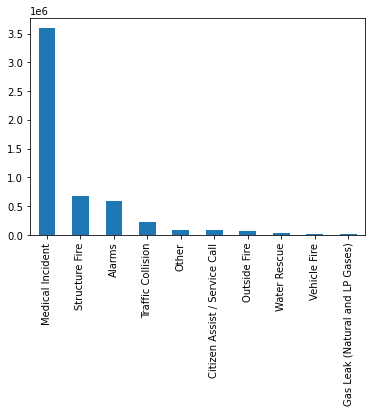

In [19]:
top10CallType=df['CallType'].value_counts().head(10).plot.bar()

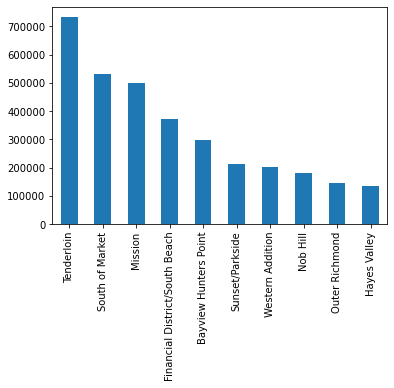

In [20]:
top10District=df['NeighborhoodDistrict'].value_counts().head(10).plot.bar()